In [3]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install joblib
!pip install xgboost


zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file = pd.read_csv("Downloads/college_outcomes_simplified.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/college_outcomes_simplified.csv'

In [ ]:
file

,degree_type,major_field,control_type,state,median_earnings_10_years
0,Bachelor_Degree,Agriculture_Natural_Resources,Public,AL,40628.0
1,Bachelor_Degree,Natural_Resources_Conservation,Public,AL,40628.0
2,Bachelor_Degree,Architecture,Public,AL,40628.0
3,Bachelor_Degree,Area_Ethnic_Cultural_Studies,Public,AL,40628.0
4,Bachelor_Degree,Communications_Technologies,Public,AL,40628.0
...,...,...,...,...,...
75618,Certificate_2_Year,Health_Professions,Private_ForProfit,ID,39645.0
75619,Bachelor_Degree,Health_Professions,Private_ForProfit,ID,39645.0
75620,Certificate_1_Year,Transportation_Materials_Moving,Private_ForProfit,TN,31102.0
75621,Certificate_2_Year,Health_Professions,Private_ForProfit,ID,37518.0


In [ ]:
file[0:1].shape

(1, 5)

In [ ]:
file["major_field"].describe()

count                  75623
unique                    38
top       Health_Professions
freq                    6903
Name: major_field, dtype: object

In [ ]:
X = file.drop(columns=["median_earnings_10_years"])
y = file["median_earnings_10_years"]

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)

print("Original shape:", X.shape)
print("Encoded shape:", X_encoded.shape)

Original shape: (75623, 4)
Encoded shape: (75623, 104)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 9260.886467630062


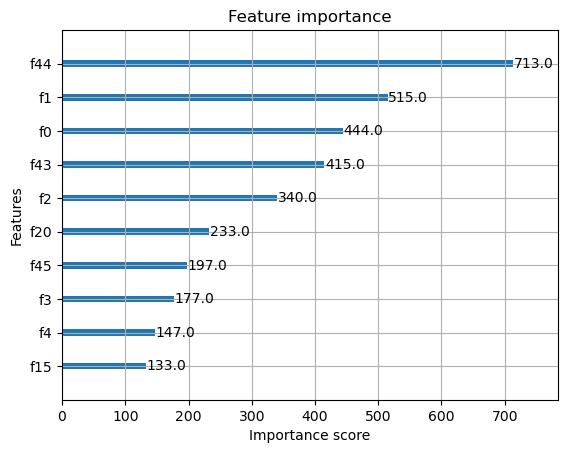

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10)
plt.show()

In [ ]:
X_test

<15125x104 sparse matrix of type '<class 'numpy.float64'>'
	with 60500 stored elements in Compressed Sparse Row format>

In [ ]:
import joblib
from joblib import dump, load

In [ ]:
joblib.dump(model,"xgb_model.joblib")
joblib.dump(encoder, "encoder.joblib")

['encoder.joblib']

In [ ]:
custom_input =[["Bachelor_Degree","Agriculture_Natural_Resources","Public","AL"]]
custom_encoded = encoder.transform(custom_input)

/Users/nihaalchowdarysurpani/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
custom_encoded.shape

(1, 104)

In [ ]:
sample_results= model.predict(custom_encoded)

In [ ]:
sample_results

array([48528.24], dtype=float32)